In [296]:
import pandas as pd
import numpy as nm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
pd.options.display.max_rows = 4000
import pingouin as pg
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib  
import scipy as sp
import statsmodels.stats.api  
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import sklearn
import math



In [7]:
#prelimanary load of test data

#fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

#data = pd.read_excel(fd,sheet_name='Raw')

In [ ]:
#data = data.rename(columns={'Unnamed: 0': 'month','Unnamed: 1':'year','Unnamed: 2':'unemprate','Unnamed: 3': 's&p500','Unnamed: 4':'pmi','Unnamed: 5':'pmi1'})
#data = data.drop([23,24,22])


#model = LinearRegression()
#x = data[['Unemployment rate change','S&P500change']]
#y = data['PMI1change']
#model = sm.OLS(y.astype(float),x.astype(float)).fit()
#predictions = model.predict(x)
#model.summary()
#model.fit(x,y)
#model.score(x, y)
#coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
#print(coeff_df)

In [45]:

#pg.corr(x=data['unemprate'].astype(float), y=data['pmi1'].astype(float))

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,21,0.079,"[-0.37, 0.49]",0.006,-0.104,0.735021,0.285,0.063


# Data loading and cleaning

In [654]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\finaladspend.xlsx")

adspend = pd.read_excel(fd,sheet_name='sheet2')

In [655]:
#adspend

adspend.columns = adspend.iloc[2,:]
adspend = adspend.drop([0,1,17,18,19,20,21])
adspend = adspend.T
adspend.columns = adspend.iloc[0,:]
adspend = adspend.drop(['MEDIA','TOTAL DOLS (000)'])
adspend = adspend.fillna(0)
adspend['mmyy']  = pd.date_range('2010-1-1','2020-1-31', freq='MS').strftime("%Y-%b").tolist()
adspend['date'] = adspend['mmyy']
adspend = adspend.set_index('date')

#adding variable exponential moving average
adspend['val_EMA'] = adspend.iloc[:,14].ewm(span=40,adjust=False).mean()


In [ ]:
#adding variable simple moving average adspend
#adspendscale['pandas_SMA_3'] = adspendscale.iloc[:,22].rolling(window=3).mean()
#adspendscale.iloc[1,24] = adspendscale.iloc[1,22]
#adspendscale['pandas_EMA'] = adspendscale.iloc[:,22].ewm(span=40,adjust=False).mean()

In [125]:
# Unemployment
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

unemp = pd.read_excel(fd,sheet_name=2)

In [127]:
unemp = unemp.drop(['Unnamed: 3',
       'https://data.bls.gov/timeseries/LNS14000000'],axis=1)
unemp = unemp.iloc[24:145,:]
unemp['mmyy']  = pd.date_range('2010-1-1','2020-1-31', freq='MS').strftime("%Y-%b").tolist()
unemp = unemp.drop(['Month','year'],axis=1)

In [133]:
#SNP 500 data
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

snp = pd.read_excel(fd,sheet_name=0)

In [134]:
snp = snp.drop(['Unnamed: 4',
       'https://finance.yahoo.com/quote/%5EGSPC/history/','Date','Month','year'],axis=1)
snp = snp.iloc[24:145,:]
snp['mmyy']  = pd.date_range('2010-1-1','2020-1-31', freq='MS').strftime("%Y-%b").tolist()


In [136]:
# Pending home sales index

fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\phsi.xlsx")

phsi = pd.read_excel(fd,sheet_name=1)


In [138]:
phsi = phsi.drop(['Item', 'Unnamed: 5','Year','Month','Date'],axis=1)
phsi = phsi.drop([115,116,117])
phsi['mmyy']  = pd.date_range('2010-7-1','2020-1-30', freq='MS').strftime("%Y-%b").tolist()

In [148]:
#Manufacturing index

fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\manufaturing index.xlsx")

manu = pd.read_excel(fd,sheet_name=0)

In [150]:
manu = manu.drop(['Item','Date','Month','Year'],axis=1)
manu = manu.drop([146,147])
manu = manu.iloc[24:145,:]
manu['mmyy']  = pd.date_range('2010-1-1','2020-1-31', freq='MS').strftime("%Y-%b").tolist()


In [ ]:
#list of database for regression 1. adspendscale 2. unempscale 3. snpscale 4. phsiscale

In [153]:
a_row = pd.DataFrame([[0,'2010-Jan'],[0,'2010-Feb'],[0,'2010-Mar'],[0,'2010-Apr'],[0,'2010-May'],[0,'2010-Jun']],columns=['Index','mmyy'])
phsi = pd.concat([a_row, phsi],ignore_index=True)
phsi = phsi.rename(columns={"Index":"phsival"})

In [657]:
#training set data with adspend,unemp, snp and phsi data

train = pd.merge(adspend,unemp)
#train
train = train.rename(columns={'value':'unempvalue'})
train = train.merge(phsi)
train = train.merge(snp)
train = train.rename(columns={'Close':'snpval'})
train = train.merge(manu)
#train['const'] = 1
train['seasonind'] = train['GRAND TOTAL'] / train['val_EMA']
train['month'] = pd.date_range('2010-1-1','2020-1-30', freq='MS').strftime("%b").tolist()
train['sessonsq'] =  train['seasonind'].apply(lambda x: math.pow (x, 2))
train['sessoncub'] =  train['seasonind'].apply(lambda x: math.pow (x, 3))

In [778]:
senti1 = senti.loc[34:154,:]
train = train.merge(senti1)

In [ ]:
#scaler = StandardScaler()

#train['snpval1'] = scaler.fit_transform(train['snpval'].values.reshape(-1,1))

In [ ]:
#train['unempvalue1'] = scaler.fit_transform(train['unempvalue'].values.reshape(-1,1))
#train['phsival1'] = scaler.fit_transform(train['phsival'].values.reshape(-1,1))

In [487]:
#Consumer confidence index
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\cci.xlsx")

cci = pd.read_excel(fd,sheet_name=0)

In [488]:
cci = cci.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
cci = cci.drop('Date',axis=1)
scaler = MinMaxScaler ()
columns = cci.columns
cci['cciscale'] = scaler.fit_transform(cci[columns])
cci['mmyy']  = pd.date_range('2008-1-1','2020-4-30', freq='MS').strftime("%Y-%b").tolist()
#cci = cci.set_index('mmyy')
cci = cci.iloc[24:145,:]


In [659]:
# adding CCI into train set to model againts adspend

train = train.merge(cci)

In [490]:
# retail sale data
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\retailsales\retailfood.xlsx")

retail = pd.read_excel(fd,sheet_name=1)


In [491]:
retail = retail.drop([ 'Unnamed: 2', 'Unnamed: 3','Period'],axis=1)
scaler = MinMaxScaler ()
columns = retail.columns
retail['retailscale'] = scaler.fit_transform(retail[columns])
retail['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
#retail = retail.set_index('mmyy')
retail = retail.iloc[24:145,:]

In [660]:
# adding CCI into train set to model againts adspend

train = train.merge(retail)


In [ ]:
#non retail sale data
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\retailsales\nonretail.xlsx")

nretail = pd.read_excel(fd,sheet_name=1)
 

In [ ]:
nretail['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
scaler = MinMaxScaler ()
columns = nretail.columns
columns = columns.drop(['Period','mmyy'])
nretail['retailscale'] = scaler.fit_transform(nretail[columns])
nretail = nretail.set_index('mmyy')
nretail = nretail.drop('Period',axis=1)

In [ ]:
# health sale data
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\retailsales\health.xlsx")

health = pd.read_excel(fd,sheet_name=1)

In [ ]:
health['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
scaler = MinMaxScaler ()
columns = health.columns
columns = columns.drop(['Period','mmyy'])
health['healthscale'] = scaler.fit_transform(health[columns])
health = health.set_index('mmyy')
health = health.drop('Period',axis=1)

In [ ]:
#electronics sale data
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\retailsales\electronics.xlsx")

electronics = pd.read_excel(fd,sheet_name=1)

In [ ]:
electronics['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
scaler = MinMaxScaler ()
columns = electronics.columns
columns = columns.drop(['Period','mmyy'])
electronics['elecscale'] = scaler.fit_transform(electronics[columns])
electronics = electronics.set_index('mmyy')
electronics = electronics.drop('Period',axis=1)

In [ ]:
#Clothing sale data
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\retailsales\clothing.xlsx")

clothing = pd.read_excel(fd,sheet_name=1)

In [ ]:
clothing['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
scaler = MinMaxScaler ()
columns = clothing.columns
columns = columns.drop(['Period','mmyy'])
clothing['clothscale'] = scaler.fit_transform(clothing[columns])
clothing = clothing.set_index('mmyy')
clothing = clothing.drop('Period',axis=1)

In [ ]:
#unemployment
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

unemp1 = pd.read_excel(fd,sheet_name='Unemployment')

In [ ]:

unemp1 = unemp1.drop(['Unnamed: 3',
       'https://data.bls.gov/timeseries/LNS14000000'],axis=1)
scaler = MinMaxScaler ()
columns = unemp1.columns
columns = columns.drop(['Month','year'])
unemp1['unempscale'] = scaler.fit_transform(unemp1[columns])
unemp1['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
unemp1 = unemp1.set_index('mmyy')
unemp1 = unemp1.drop(['Month','year'],axis=1)        


In [ ]:
#SNP 500
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

snp = pd.read_excel(fd,sheet_name=0)

In [ ]:
snp = snp.drop(['Unnamed: 4',
       'https://finance.yahoo.com/quote/%5EGSPC/history/'],axis=1)
scaler = MinMaxScaler ()
columns = snp.columns
columns = columns.drop(['Date','Month','year'])
snp['snpscale'] = scaler.fit_transform(snp[columns])
snp['mmyy']  = pd.date_range('2008-1-1','2020-3-30', freq='MS').strftime("%Y-%b").tolist()
snp = snp.set_index('mmyy')
snp = snp.drop(['Date','Month','year'],axis=1)
snp = snp.iloc[0:146,:]

In [ ]:
#train set with cci,retail,nretail,health,electronics,clothing,unemp1,snp,manu
cci['mmyy1'] = cci.index
retail['mmyy1'] = retail.index
nretail['mmyy1'] = nretail.index
health['mmyy1'] = health.index
electronics['mmyy1'] = electronics.index
clothing['mmyy1'] = clothing.index
unemp1['mmyy1'] = unemp1.index
snp['mmyy1'] = snp.index




In [ ]:
train1= pd.merge(cci,retail)
train1 = train1.merge(nretail)
train1 = train1.merge(nretail)
train1 = train1.merge(health)
train1 = train1.merge(electronics)
train1 = train1.merge(clothing)
train1 = train1.merge(unemp1)
train1 = train1.merge(snp)
#train1 = train1.merge(manu)
train1['cnst'] = 1
train1['snpchange'] = train1['Close']/1000

### Dataset for predicting adpsend model

In [789]:
train['consentival'] = train['consentival'].apply(pd.to_numeric,errors='coerce')

In [780]:
train.columns

Index(['MEDIA', 'Network TV', 'Cable TV', 'Syndication', 'Magazines',
       'Natl Newsp', 'Newspapers', 'Hispanic Newsp', 'Network Radio', 'Cinema',
       'Int Display', 'Mobile Web (from Apr 2015)', 'Online Video',
       'Int Search', 'GRAND TOTAL', 'mmyy', 'val_EMA', 'unempvalue', 'phsival',
       'snpval', 'Index', 'seasonind', 'month', 'sessonsq', 'sessoncub',
       'CCI value', 'cciscale', 'retailfoodservValue', 'retailscale',
       'consentival'],
      dtype='object')

In [790]:
#train set for model build 
df = train[['GRAND TOTAL','unempvalue','val_EMA','seasonind','sessonsq','sessoncub','CCI value','retailfoodservValue','month','mmyy','snpval','consentival']]
df = pd.get_dummies(df,prefix=['month'],columns=['month'],drop_first=True)

In [791]:
train1 = df.loc[0:112,:]
 

In [792]:
#validation set
val = df.loc[113:117,:]

In [793]:
trainplusval = df.loc[0:117,:]

In [794]:
#test set
test = df.loc[118:121,:]


### Dataset for predicting consumer confidence 

In [681]:
# jobless claim data to predict unemployment and CCI

fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\jobless.xlsx")

jobless = pd.read_excel(fd,sheet_name='Sheet2')

In [687]:
jobless['mmyy']  = pd.date_range('2008-1-1','2020-4-30', freq='MS').strftime("%Y-%b").tolist()
jobless = jobless.drop(['Date','Month','Day','Year'],axis=1)


In [688]:
#Consumer confidence index
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\cci.xlsx")

cci1 = pd.read_excel(fd,sheet_name=0)

In [691]:
cci1 = cci1.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
cci1 = cci1.drop('Date',axis=1)
cci1['mmyy']  = pd.date_range('2008-1-1','2020-4-30', freq='MS').strftime("%Y-%b").tolist()


In [707]:
#SNP 500 data
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

snp1 = pd.read_excel(fd,sheet_name=0)

In [710]:
snp1 = snp1.drop(['Unnamed: 4',
       'https://finance.yahoo.com/quote/%5EGSPC/history/','Date','Month','year'],axis=1)
 
snp1['mmyy']  = pd.date_range('2008-1-1','2020-4-30', freq='MS').strftime("%Y-%b").tolist()

In [723]:
#consumer sentiment
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\consumersentiments.xlsx")

senti = pd.read_excel(fd,sheet_name=0)


In [724]:
senti = senti.drop([0,1,2,3,4,5,6,7,8,9])
senti = senti.drop(['Unnamed: 2','FRED Graph Observations'],axis=1)
senti = senti.rename(columns={'Unnamed: 1':'consentival'})
senti['mmyy']  = pd.date_range('2008-1-1','2020-4-30', freq='MS').strftime("%Y-%b").tolist()

In [695]:
df = pd.merge(jobless,cci1)

In [712]:
df = df.merge(snp1)

In [728]:
df = df.merge(senti)

In [738]:
df['consentival'] = df['consentival'].apply(pd.to_numeric,errors='coerce')

In [742]:
#trainset

train1 = df.loc[0:135,:]

#valset
val1 = df.loc[136:143,:]

#trainplusval
valt = df.loc[0:143,:]

#testset
test = df.loc[144:148,:]


# Exploratory analysis

Text(0, 0.5, 'GRAND TOTAL')

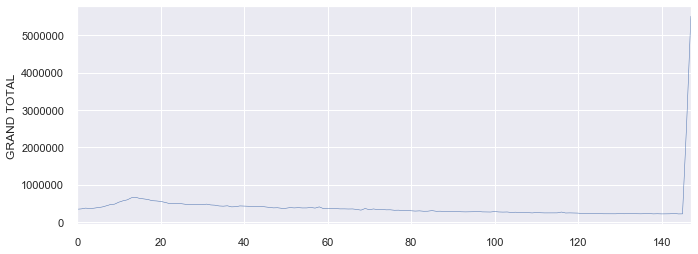

In [702]:
#time series plot adspend 

sns.set(rc={'figure.figsize':(11, 4)})
df['4-week average initial claims'].plot(linewidth=.5).set_ylabel('GRAND TOTAL')


Text(0, 0.5, 'pandas_EMA')

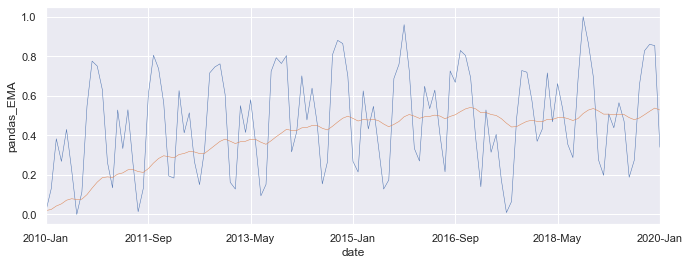

In [387]:
sns.set(rc={'figure.figsize':(11, 4)})
adspendscale['GRAND TOTAL'].plot(linewidth=.5).set_ylabel('GRAND TOTAL')
adspendscale['pandas_EMA'].plot(linewidth=.5).set_ylabel('pandas_EMA')

Text(0, 0.5, 'ratechange')

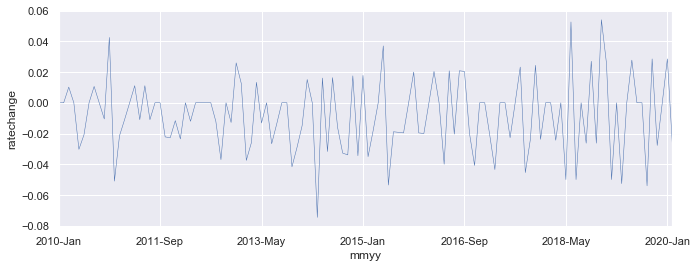

In [120]:
sns.set(rc={'figure.figsize':(11, 4)})
unempchange['ratechange'].plot(linewidth=.5).set_ylabel('ratechange')

Text(0, 0.5, 'value')

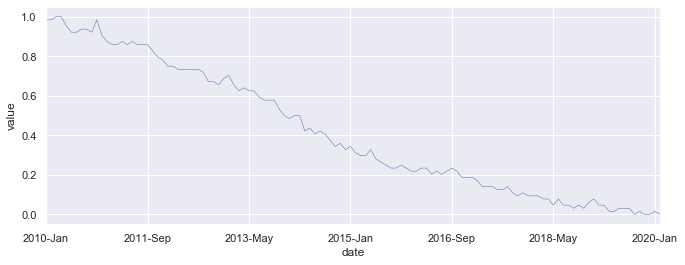

In [321]:
sns.set(rc={'figure.figsize':(11, 4)})
unempscale['value'].plot(linewidth=.5).set_ylabel('value')

In [740]:
import pingouin as pg
pg.corr(x=df['CCI value'], y=df['consentival'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,148,0.902,"[0.87, 0.93]",0.814,0.812,3.227641e-55,4.429e+51,1.0


In [276]:
import pingouin as pg
pg.corr(x=unempchange['ratechange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.097,"[-0.27, 0.08]",0.01,-0.007,0.287499,0.199,0.187


In [379]:
 pg.corr(x=unempscale['value'].iloc[0:121], y=adspendscale['pandas_SMA_3'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.324,"[-0.48, -0.15]",0.105,0.09,0.000283,76.464,0.956


In [164]:
train.columns

Index(['MEDIA', 'Network TV', 'SLN TV', 'Cable TV', 'Syndication', 'Magazines',
       'Sunday Mags', 'Local Mags', 'Hispanic Mags', 'B-to-B', 'Natl Newsp',
       'Newspapers', 'Hispanic Newsp', 'Network Radio', 'Cinema',
       'Int Display', 'Mobile Web (from Apr 2015)', 'Mobile App',
       'Online Video', 'Int Search', 'GRAND TOTAL', 'mmyy', 'val_EMA',
       'unempvalue', 'phsival', 'snpval', 'Index', 'const'],
      dtype='object')

In [165]:
 pg.corr(x=train['unempvalue'], y=train['val_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.92,"[-0.94, -0.89]",0.846,0.843,3.924802e-50,3.655e+46,1.0


Text(0, 0.5, 'indexratechange')

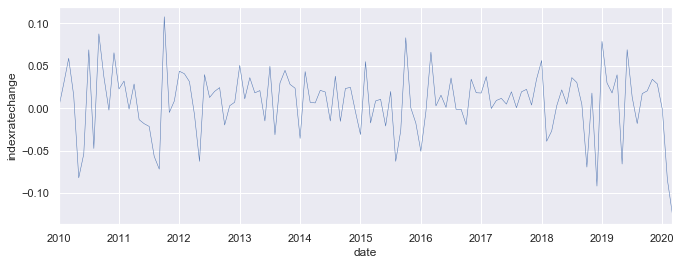

In [140]:
sns.set(rc={'figure.figsize':(11, 4)})
snpchange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

Text(0, 0.5, 'SNPIndexClose')

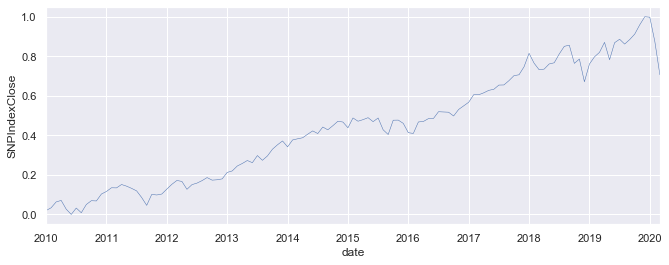

In [286]:
sns.set(rc={'figure.figsize':(11, 4)})
snpscale['Close'].plot(linewidth=.5).set_ylabel('SNPIndexClose')

In [142]:

pg.corr(x=snpchange['indexchange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.045,"[-0.22, 0.13]",0.002,-0.015,0.626385,0.128,0.078


In [287]:

pg.corr(x=snpscale['Close'].iloc[0:121], y=adspendscale['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,0.206,"[0.03, 0.37]",0.043,0.026,0.023244,1.447,0.626


In [380]:

pg.corr(x=snpscale['Close'].iloc[0:121], y=adspendscale['pandas_SMA_3'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,0.299,"[0.13, 0.45]",0.09,0.074,0.000848,27.789,0.92


In [389]:
pg.corr(x=snpscale['Close'].iloc[0:121], y=adspendscale['pandas_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,0.828,"[0.76, 0.88]",0.685,0.68,1.215464e-31,2.655e+28,1.0


Text(0, 0.5, 'indexratechange')

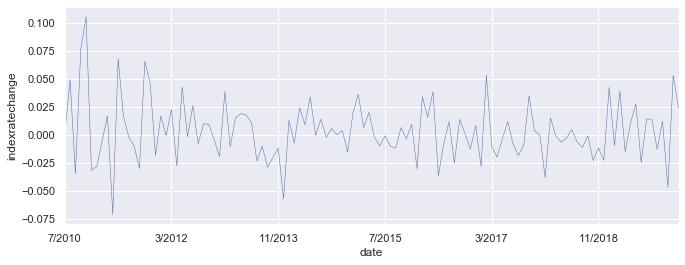

In [173]:
sns.set(rc={'figure.figsize':(11, 4)})
phsichange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

Text(0, 0.5, 'PhsiIndex')

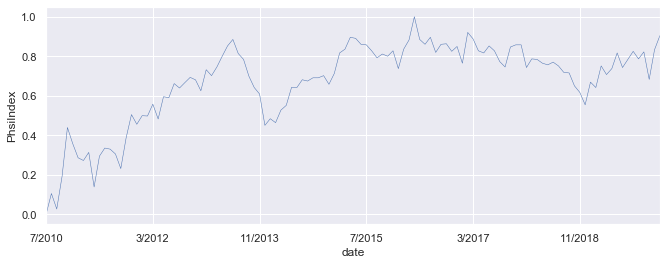

In [294]:
sns.set(rc={'figure.figsize':(11, 4)})
phsiscale['Index'].plot(linewidth=.5).set_ylabel('PhsiIndex')

In [174]:
pg.corr(x=phsichange['indexchange'].iloc[0:115], y=adspendchange['GRAND TOTAL'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,-0.002,"[-0.18, 0.18]",0.0,-0.018,0.983731,0.117,0.05


In [295]:
pg.corr(x=phsiscale['Index'].iloc[0:115], y=adspendscale['GRAND TOTAL'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,0.108,"[-0.08, 0.29]",0.012,-0.006,0.252469,0.223,0.209


In [381]:
pg.corr(x=phsiscale['Index'].iloc[0:115], y=adspendscale['pandas_SMA_3'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,0.163,"[-0.02, 0.34]",0.027,0.009,0.081164,0.523,0.417


In [390]:

pg.corr(x=phsiscale['Index'].iloc[0:115], y=adspendscale['pandas_EMA'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,0.849,"[0.79, 0.89]",0.72,0.715,4.862277e-33,6.071e+29,1.0


Text(0, 0.5, 'indexratechange')

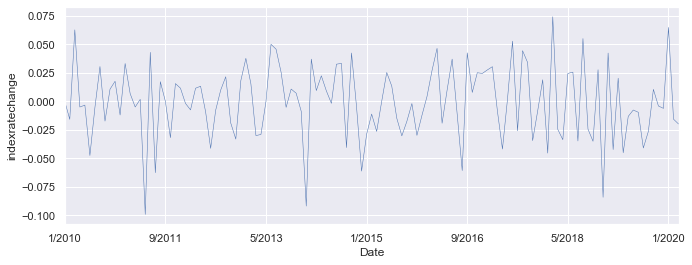

In [183]:
sns.set(rc={'figure.figsize':(11, 4)})
manuchange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

Text(0, 0.5, 'ManuIndex')

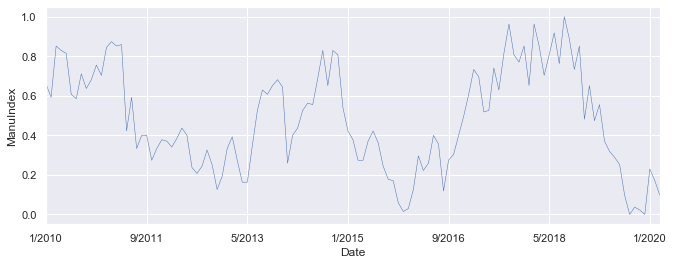

In [305]:
sns.set(rc={'figure.figsize':(11, 4)})
manuscale['Index'].plot(linewidth=.5).set_ylabel('ManuIndex')

In [185]:

pg.corr(x=manuchange['indexchange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.097,"[-0.27, 0.08]",0.009,-0.007,0.291557,0.197,0.184


In [306]:

pg.corr(x=manuscale['Index'].iloc[0:121], y=adspendscale['GRAND TOTAL'])


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.11,"[-0.28, 0.07]",0.012,-0.005,0.227802,0.233,0.227


In [382]:

pg.corr(x=manuscale['Index'].iloc[0:121], y=adspendscale['pandas_SMA_3'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.169,"[-0.34, 0.01]",0.028,0.012,0.064181,0.618,0.459


In [392]:
pg.corr(x=manuscale['Index'].iloc[0:121], y=adspendscale['pandas_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.231,"[-0.39, -0.06]",0.053,0.037,0.010692,2.842,0.728


In [964]:
pg.corr(x=train['unempvalue'], y=train['val_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.918,"[-0.94, -0.88]",0.843,0.84,1.154486e-49,1.267e+46,1.0


In [ ]:
pg.corr(x=train['unempvalue1'], y=train['snpval1'])

In [ ]:
matplotlib.pyplot.scatter(train['val_EMA'],train['value'])

Text(0, 0.5, 'SeasonIndex')

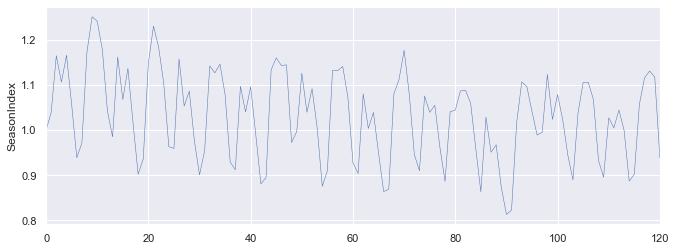

In [200]:
sns.set(rc={'figure.figsize':(11, 4)})
train['seasonind'].plot(linewidth=.5).set_ylabel('SeasonIndex')

# Building regression model

### Model to predict adspend

In [830]:
train1.columns

Index(['GRAND TOTAL', 'unempvalue', 'val_EMA', 'seasonind', 'sessonsq',
       'sessoncub', 'CCI value', 'retailfoodservValue', 'mmyy', 'snpval',
       'consentival', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep'],
      dtype='object')

In [838]:
#train data for model
x_train = train1.drop(['GRAND TOTAL','mmyy','val_EMA','seasonind','sessonsq','retailfoodservValue'],axis=1)

y_train = train1['GRAND TOTAL']

#validation data for model
x_val = val.drop(['GRAND TOTAL','mmyy','val_EMA','seasonind','sessonsq','retailfoodservValue'],axis=1)

y_val = val['GRAND TOTAL']

#train plus validation data for model
x_tval = trainplusval.drop(['GRAND TOTAL','mmyy','val_EMA','seasonind','sessonsq','retailfoodservValue'],axis=1)
y_tval = trainplusval['GRAND TOTAL']

#test data for model
x_test = test.drop(['GRAND TOTAL','mmyy','val_EMA','seasonind','sessonsq','retailfoodservValue'],axis=1)
y_test = test['GRAND TOTAL']


In [839]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#model = LinearRegression()

X2 = sm.add_constant(x_tval)
model = sm.OLS(y_tval,X2).fit()
#predictions = model.predict(x)
model.summary()
#model.fit(x,y)
#model.score(x, y)
#coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
#print(coeff_df)


c:\users\varunn\appdata\local\continuum\anaconda3\envs\py37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GRAND TOTAL   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     179.7
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.39e-66
Time:                        20:08:13   Log-Likelihood:                -1596.2
No. Observations:                 118   AIC:                             3226.
Df Residuals:                     101   BIC:                             3273.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.172e+07   7.28e+05     16.099      0.000    1.03e+07    1.32e+07
unempvalue  -4.389e+05   4.55e+04     -9.637      0.000   -5.29e+05   -3.49e+05
sessoncub    2.493e+06   1.56e+05     15.977      0.000    2.18e+06     2.8e+06
CCI value   -6390.4288   3207.500     -1.992      0.049   -1.28e+04     -27.612
snpval       -130.9059    170.747     -0.767      0.445    -469.623     207.811
consentival -1.255e+04   5050.675     -2.484      0.015   -2.26e+04   -2526.795
month_Aug   -4.315e+05   1.03e+05     -4.201      0.000   -6.35e+05   -2.28e+05
month_Dec    1.169e+05   9.75e+04      1.199      0.233   -7.65e+04     3.1e+05
month_Feb   -2.389e+05   9.67e+04     -2.469      0.015   -4.31e+05    -4.7e+04
month_Jan   -1.259e+05   9.32e+04     -1.351      0.180   -3.11e+05     5.9e+04
month_Jul   -4.697e+05    1.1e+05     -4.274      0.000   -6.88e+05   -2.52e+05
month_Jun   -9.546e+04   9.13e+04     -1.046      0.298   -2.76e+05    8.56e+04
month_Mar    4.516e+04   9.77e+04      0.462      0.645   -1.49e+05    2.39e+05
month_May    6.831e+04   9.15e+04      0.747      0.457   -1.13e+05     2.5e+05
month_Nov    6.717e+04   1.12e+05      0.600      0.550   -1.55e+05    2.89e+05
month_Oct    -2.98e+04   1.11e+05     -0.269      0.788   -2.49e+05     1.9e+05
month_Sep   -9.736e+04   9.76e+04     -0.997      0.321   -2.91e+05    9.63e+04
==============================================================================
Omnibus:                       15.764   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.578
Skew:                          -0.880   Prob(JB):                     0.000152
Kurtosis:                       3.693   Cond. No.                     8.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [840]:
x_test = sm.add_constant(x_test)
ypred = model.predict(x_test)
print(ypred)

118    1.156223e+07
119    1.143733e+07
120    9.657761e+06
dtype: float64


In [841]:
df = pd.DataFrame({'Actual':y_test,'Predicted':ypred})
df

,Actual,Predicted
118,11693046.8,1.156223e+07
119,11638003.8,1.143733e+07
120,9743035.5,9.657761e+06


In [842]:
#MAE - Mean absolute error and RMSE - Root mean squared error

R2 = sklearn.metrics.r2_score(y_test,ypred)
MAE = sklearn.metrics.mean_absolute_error(y_test,ypred)
RMSE = nm.sqrt(sklearn.metrics.mean_squared_error(y_test,ypred))

print("R2: {0:.3f}".format(R2))
print("MAE: {0:.1f}".format(MAE))
print("RMSE: {0:.1f}".format(RMSE))

R2: 0.974
MAE: 138921.4
RMSE: 146804.0


In [844]:
x_test

,const,unempvalue,sessoncub,CCI value,snpval,consentival,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
118,1.0,3.5,1.501660,126.1,3140.979980,96.8,0,0,0,0,0,0,0,0,1,0,0
119,1.0,3.5,1.450683,126.8,3230.780029,99.3,0,1,0,0,0,0,0,0,0,0,0
120,1.0,3.6,0.857724,128.2,3225.520020,99.8,0,0,0,1,0,0,0,0,0,0,0


In [845]:
#sessoncub for feb 2019 = .746109
ypred = model.predict([1,8.5,1.059849,120,2874.56,71.0,0,0,0,0,0,0,0,0,0,0,0])
print(ypred)

[8596897.40442286]


### Model to predict consumer index

In [766]:

df.columns

Index(['S.A.', '4-week average initial claims', 'mmyy', 'CCI value', 'Close',
       'consentival'],
      dtype='object')

In [760]:
#train data for model
x_train = train1.drop(['CCI value','mmyy','S.A.'],axis=1)

y_train = train1['CCI value']

#validation data for model
x_val = val1.drop(['CCI value','mmyy','S.A.'],axis=1)

y_val = val1['CCI value']

#train plus validation data for model
x_tval =  valt.drop(['CCI value','mmyy','S.A.'],axis=1)
y_tval = valt['CCI value']

#test data for model
x_test = test.drop(['CCI value','mmyy','S.A.'],axis=1)
y_test = test['CCI value']

In [761]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X2 = sm.add_constant(x_train)
model1 = sm.OLS(y_train,X2).fit()
model1.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CCI value   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     749.7
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.11e-82
Time:                        22:17:23   Log-Likelihood:                -451.26
No. Observations:                 136   AIC:                             910.5
Df Residuals:                     132   BIC:                             922.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -7.0190     10.853     -0.647      0.519     -28.487      14.449
4-week average initial claims  -1.94e-05   1.39e-05     -1.398      0.164   -4.68e-05    8.04e-06
Close                             0.0351      0.003     10.948      0.000       0.029       0.041
consentival                       0.4207      0.111      3.806      0.000       0.202       0.639
==============================================================================
Omnibus:                       15.304   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.077
Skew:                           0.646   Prob(JB):                     4.37e-05
Kurtosis:                       4.369   Cond. No.                     6.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [758]:
x_val

,const,4-week average initial claims,Close,consentival
136,1.0,218250,2752.060059,100.0
137,1.0,221250,2941.760010,98.2
138,1.0,213750,2980.379883,98.4
139,1.0,216750,2926.459961,89.8
140,1.0,213000,2976.739990,93.2
141,1.0,215000,3037.560059,95.5
142,1.0,215500,3140.979980,96.8
143,1.0,226000,3230.780029,99.3


In [763]:
x_val = sm.add_constant(x_val)
ypred = model1.predict(x_val)
print(ypred)

136    127.496680
137    133.345543
138    134.931916
139    129.361636
140    132.631063
141    135.696475
142    139.866868
143    143.869606
dtype: float64


In [764]:
check = pd.DataFrame({'Actual':y_val,'Predicted':ypred})
check

,Actual,Predicted
136,129.2,127.496680
137,131.3,133.345543
138,124.3,134.931916
139,135.8,129.361636
140,134.2,132.631063
141,126.3,135.696475
142,126.1,139.866868
143,126.8,143.869606


In [765]:
#MAE - Mean absolute error and RMSE - Root mean squared error

R2 = sklearn.metrics.r2_score(y_val,ypred)
MAE = sklearn.metrics.mean_absolute_error(y_val,ypred)
RMSE = nm.sqrt(sklearn.metrics.mean_squared_error(y_val,ypred))

print("R2: {0:.3f}".format(R2))
print("MAE: {0:.1f}".format(MAE))
print("RMSE: {0:.1f}".format(RMSE))

R2: -5.073
MAE: 7.8
RMSE: 9.6


### Test for model properties i.e error normality, residul vs fitted, error scatter plot

In [632]:
pred_val = model.fittedvalues.copy()
true_val = train['pandas_EMA'].values.copy()
residual = true_val - pred_val

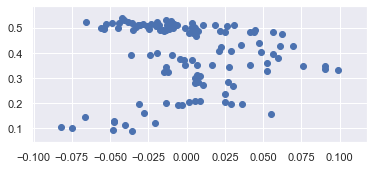

In [633]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

0.9872571978014918

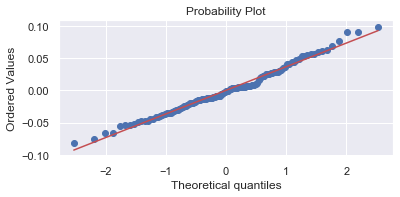

In [636]:
# Error QQ plot - testing for normality

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2


In [638]:

_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual, train[['unempvalue','phsival','snpval']])
pval, f_pval


(9.786348884292399e-11, 2.8097235607765093e-12)

In [221]:
plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [223]:
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues

# model residuals
model_residuals = model.resid

# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = nm.sqrt(nm.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = nm.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

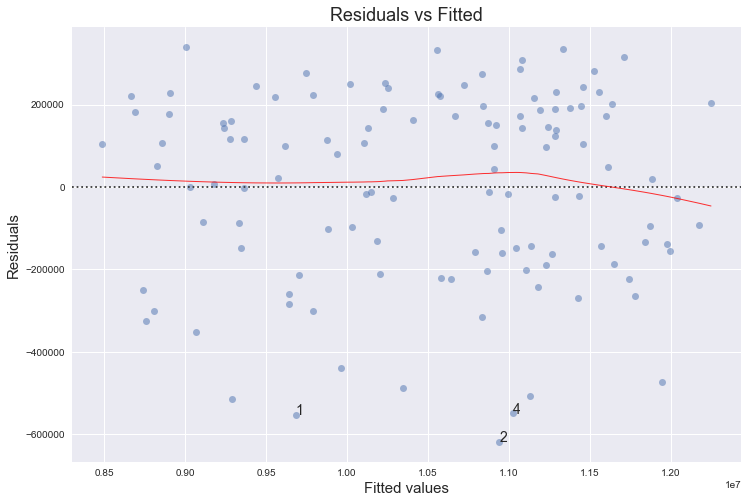

In [224]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'GRAND TOTAL', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));


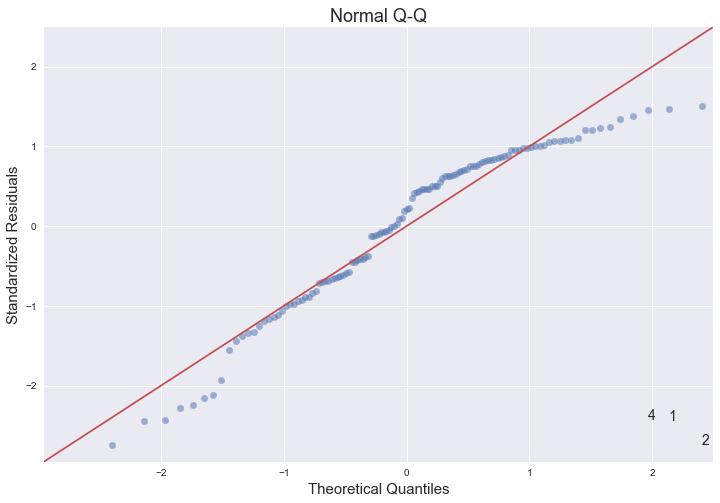

In [228]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = nm.flip(nm.argsort(nm.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(nm.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [657]:

x = train[['const','unempvalue1','phsival1','snpval1']]
y = train['pandas_EMA']
model1 = sm.OLS(y,x).fit()
model1.summary()
#model.fit(x,y)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pandas_EMA   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     517.5
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.46e-67
Time:                        22:40:56   Log-Likelihood:                 229.84
No. Observations:                 121   AIC:                            -451.7
Df Residuals:                     117   BIC:                            -440.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3938      0.003    117.626      0.000       0.387       0.400
unempvalue1    -0.1164      0.016     -7.159      0.000      -0.149      -0.084
phsival1        0.0559      0.006      9.106      0.000       0.044       0.068
snpval1        -0.0361      0.014     -2.656      0.009      -0.063      -0.009
==============================================================================
Omnibus:                        2.772   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.618
Skew:                           0.359   Prob(JB):                        0.270
Kurtosis:                       2.942   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'value')

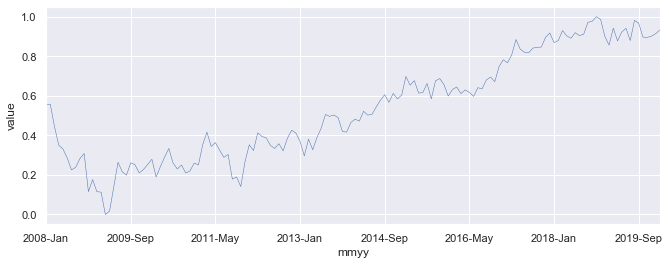

In [60]:
#cci ploit
sns.set(rc={'figure.figsize':(11, 4)})
cci['cciscale'].plot(linewidth=.5).set_ylabel('value')

Text(0, 0.5, 'value')

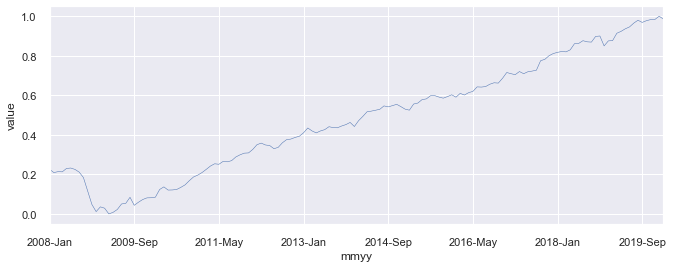

In [767]:
sns.set(rc={'figure.figsize':(11, 4)})
retail['retailscale'].plot(linewidth=.5).set_ylabel('value')

In [768]:
pg.corr(x=retail['retailscale'], y=cci['cciscale'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,146,0.958,"[0.94, 0.97]",0.918,0.917,5.441047e-80,1.116e+76,1.0


Text(0, 0.5, 'value')

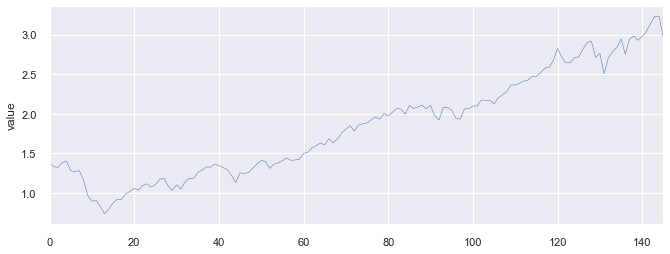

In [976]:
sns.set(rc={'figure.figsize':(11, 4)})
train1['snpchange'].plot(linewidth=.5).set_ylabel('value')

In [1049]:
pg.corr(x=train1['retailfoodservValue'], y=train1['value'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,146,-0.882,"[-0.91, -0.84]",0.778,0.775,6.235998e-49,2.834e+45,1.0


In [1050]:
x = train1[['cnst','value']]
y = train1['retailfoodservValue']
model = sm.OLS(y,x).fit()
model.summary()
#model.fit(x,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     retailfoodservValue   R-squared:                       0.778
Model:                             OLS   Adj. R-squared:                  0.777
Method:                  Least Squares   F-statistic:                     505.0
Date:                 Fri, 10 Apr 2020   Prob (F-statistic):           6.24e-49
Time:                         02:05:32   Log-Likelihood:                -1696.5
No. Observations:                  146   AIC:                             3397.
Df Residuals:                      144   BIC:                             3403.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cnst        5.802e+05   7199.114     80.594      0.000    5.66e+05    5.94e+05
value      -2.402e+04   1068.938    -22.473      0.000   -2.61e+04   -2.19e+04
==============================================================================
Omnibus:                       60.359   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.186
Skew:                          -1.828   Prob(JB):                     2.68e-30
Kurtosis:                       6.004   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1047]:
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues

# model residuals
model_residuals = model.resid

# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

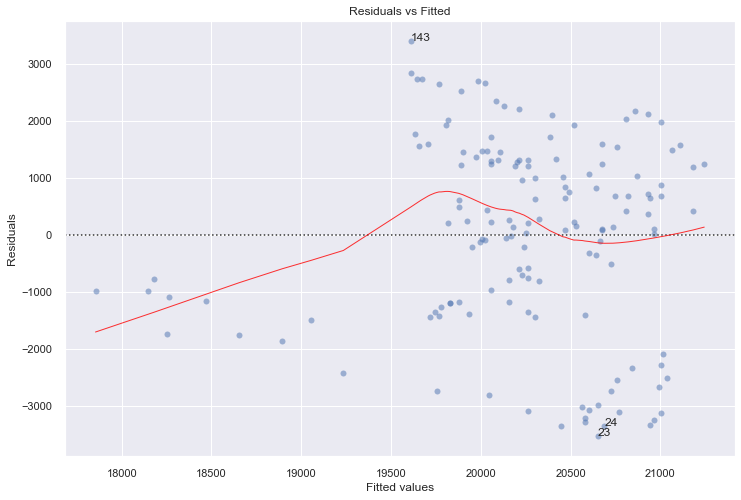

In [1048]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'clothingval', data=train1, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

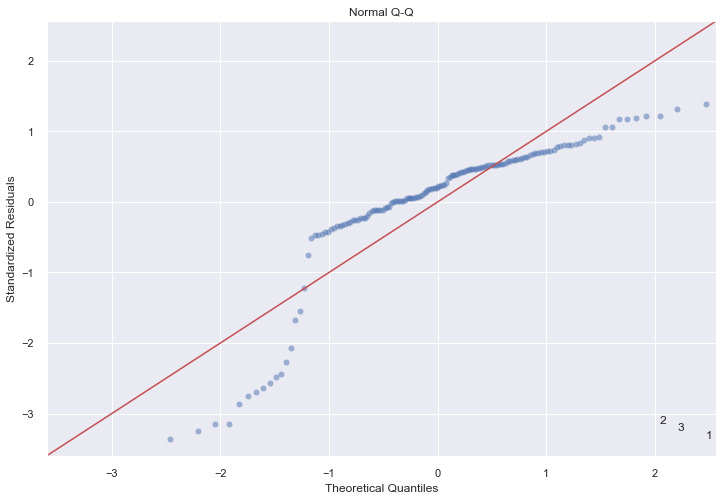

In [990]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [91]:
import pingouin as pg
pg.corr(x=unemp1[unemp1.index > '2010-1-1'].iloc[0:121,1], y=adspend['val_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.918,"[-0.94, -0.88]",0.843,0.84,1.154486e-49,1.267e+46,1.0


In [95]:

pg.corr(x=unemp1[unemp1.index > '2010-1-1'].iloc[0:121,1], y=retail[retail.index > '2010-1-1'].iloc[0:121,1])
 

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.972,"[-0.98, -0.96]",0.945,0.945,5.081671e-77,9.487e+72,1.0
